In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 


# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("datasets/dataset_clean.csv")
dataset['RIESGO_VIDA'] = np.where(dataset['RIESGO_VIDA'] == 'si', 1,0)
display(dataset.head(n = 5))

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,12,16,19,20,21,22,23,24,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,...,bogota d.c.,bogotá,juridica,escrito,pqr,cerrado,peticion directa,reclamo,0,trim i
1,1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,...,nariño,puerres,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
2,2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,...,valle,cali,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
3,3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,...,huila,neiva,natural,personalizado,pqr,cerrado,0,reclamo,0,trim i
4,4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,...,risaralda,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,reclamo,1,trim i


In [8]:
display(dataset[['COD_MACROMOT']].drop_duplicates().sort_values(by=['COD_MACROMOT']))

,COD_MACROMOT
0,1
10,2
390,3
12,4
44,5
403657,8
406399,9
240,10


# Data Exploration

## Features Class Distribution

In [2]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dfColumns = pd.DataFrame(columns=['Feature','Distinct Values'])

for colName in dataset.columns.values:
    dfColumns = dfColumns.append({'Feature': colName, 'Distinct Values': dataset[colName].unique().size}, ignore_index=True)
dfColumns = dfColumns.infer_objects()
display(dfColumns.head(n = 5))



,Feature,Distinct Values
0,AFEC_DPTO,36
1,AFEC_EDADR,11
2,AFEC_EDUC,10
3,AFEC_GENERO,4
4,AFEC_GETNICO,10


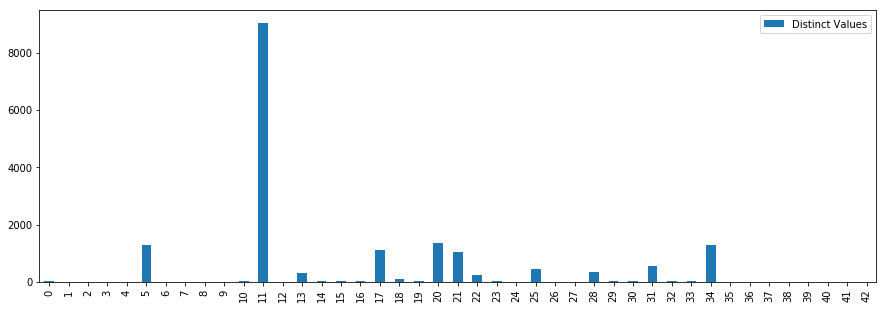

In [3]:
dfColumns.plot( kind='bar', figsize = (15,5))

## Data overview

In [4]:
from __future__ import division
# TODO: Total number of records
n_records = dataset['RIESGO_VIDA'].count()

# TODO: Number of records where individual's life is at risk
life_risk = dataset[dataset["RIESGO_VIDA"] == 1]
n_life_risk = life_risk['RIESGO_VIDA'].count()

# TODO: Number of records where individual's life is not at risk
no_life_risk =  dataset[dataset["RIESGO_VIDA"] == 0]
n_no_life_risk = no_life_risk['RIESGO_VIDA'].count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_life_risk/n_records)*100

# Print the results
print "Total number of records: {:,}".format(n_records)
print "Individuals with life at risk: {:,}".format(n_life_risk)
print "Individuals with life not at risk: {:,}".format(n_no_life_risk)
print "Percentage of individuals with life at risk: {:.2f}%".format(greater_percent)

Total number of records: 2,130,783
Individuals with life at risk: 288,811
Individuals with life not at risk: 1,841,972
Percentage of individuals with life at risk: 13.55%


## Encoding dataset

All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features instead hot encoding it.

In [5]:
features_columns = dataset.columns.values.tolist()
from src import preprocess
features_columns.remove('RIESGO_VIDA')
p = preprocess.Preprocess()
dataset_encoded = p.encodeFeatures(p.likeliHood, dataset, features_columns, 'RIESGO_VIDA')
display(dataset_encoded)  


Encoding: AFEC_DPTO
Encoding: AFEC_EDADR
Encoding: AFEC_EDUC
Encoding: AFEC_GENERO
Encoding: AFEC_GETNICO
Encoding: AFEC_MPIO
Encoding: AFEC_PARENTESCO
Encoding: AFEC_POBESPECIAL
Encoding: AFEC_REGAFILIACION
Encoding: AFEC_TIPOPER
Encoding: ALTO_COSTO
Encoding: CIE_10
Encoding: COD_MACROMOT


/anaconda2/lib/python2.7/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison